Fisrt we will sample visualise the RAVDNESS Data and plot the spectogram of the sample case.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa 
import os,glob,pickle
import sklearn
import librosa.display

In [2]:
def load_audio():
    main_audio_path = '/home/gauravk/Desktop/BCS_SER/archive'

    audio_path = '' 
    # This array contains directory of audio of all actors, Actor_01 at '0' index, Actor_02 at '1' index
    actor_audio_path = []

    for i in range(0, 24): 
        if(i < 9): 
            audio_path = main_audio_path + '/Actor_0' + str(i+1) 
        else: 
            audio_path = main_audio_path + '/Actor_' + str(i+1) 
        actor_audio_path.append(os.listdir(audio_path)) 
        actor_audio_path[i] = [audio_path + '/' + s for s in actor_audio_path[i]]

    # x - Audio time series - x[t] corresponds to the amplitude of the waveform at sample t.
    # sr - Sampling Rate - Samples recorded per second
    x = []; sr = []

    for i in range(0, 24):
        for j in range(0, len(actor_audio_path[i])):
            x_, sr_ = librosa.load(actor_audio_path[i][j])
            x.append(x_)
            sr.append(sr_)
    
    x = np.array(x, dtype=object)
    x = np.reshape(x, (24, -1))
    # x.shape
    sr = np.array(sr, dtype=object)
    sr = np.reshape(sr, (24, -1))
    # sr.shape
    
    return x, sr

In [13]:
def plot(x, sr):
    # Waveplot
    plt.figure(figsize=(20, 5))
    plt.title("Waveplot")
    librosa.display.waveplot(x, sr = sr)

    # Spectrogram
    X = librosa.stft(x) # stft is Short time fourier transformation
    Xdb = librosa.amplitude_to_db(abs(X)) # Coverting amplitude to decibel
    plt.figure(figsize=(20, 5))
    plt.title("Spectrogram")
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

    # mfcc
    plt.figure(figsize=(20, 5))
    plt.title("MFCC")
    mfccs = librosa.feature.mfcc(x, sr = sr)
    print("MFCC shape:",mfccs.shape)
    librosa.display.specshow(mfccs, sr = sr, x_axis='time')


In [5]:
x,sr= load_audio()

Use the file 03-01-01-01-01-01-01.wav as a sample to load, play and plot spectograph of it. 

MFCC shape: (20, 179)


(24, 60)

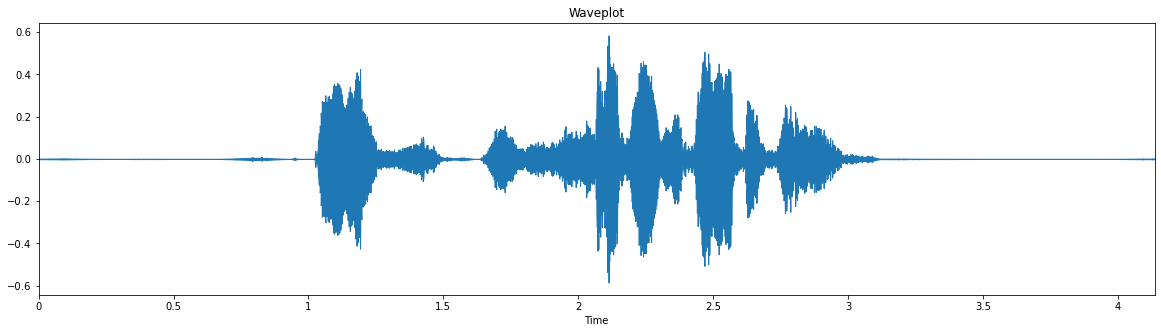

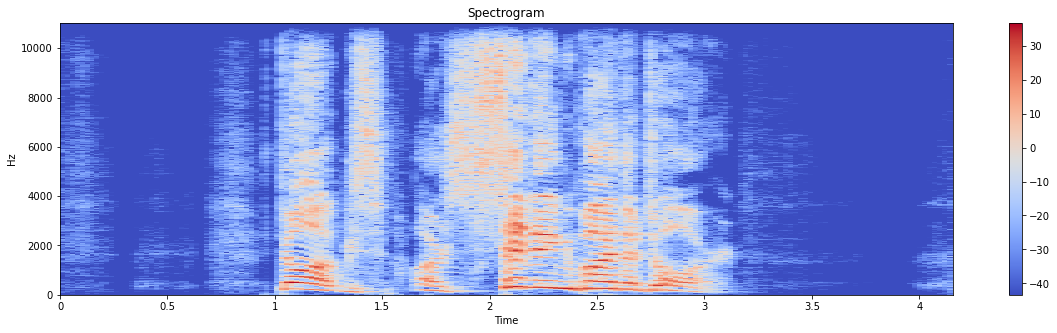

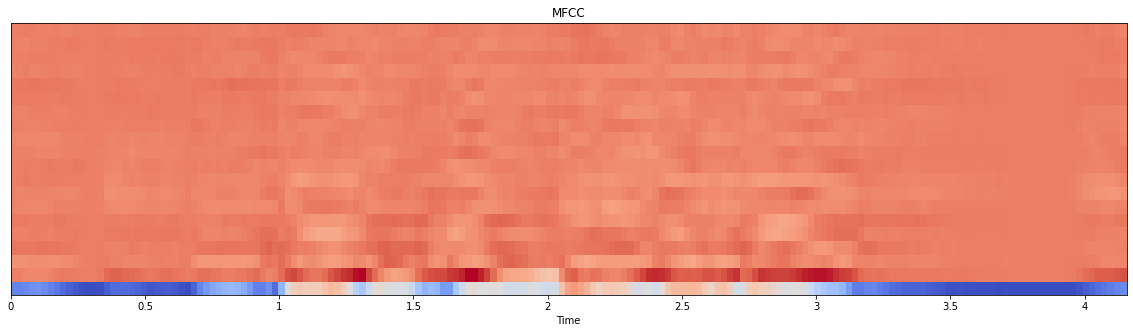

In [15]:
# x contains Audio time series of each audio of each actor and Shape = (24, 60)
# x[0] has Audio time series of 60 Speeches of Actor_1
# # sr contains sampling rate of each audio of each actor and shape = (24, 60)

# Plot Waveform, Spectrogram an MFCC of first audio of first Actor
plot(x[0][0], sr[0][0])
x.shape

<b>Feature Extraction<b>

MFCC for a single file 

(20, 143)
-17.411512


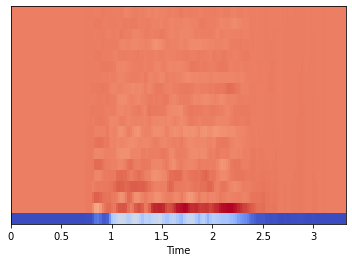

In [30]:
audio_path='/home/gauravk/Desktop/BCS_SER/archive/Actor_01/03-01-01-01-01-01-01.wav'
x,sr=librosa.load(audio_path)
mfccs=librosa.feature.mfcc(x,sr=sr)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
mfcc=np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40))
print(mfcc)

Feature extraction for all the files: store the emotion, gender and mfccs values for each file.

In [42]:
def load_data_features():
    main_audio_path = '/home/gauravk/Desktop/BCS_SER/archive/Actor_*/*_.wav'
    
    X=[]
    #emotion=[]
    #gender=[]
    #actor=[]
    #file_path=[]
    
    #load the emotion,actor,gender from the file_name and also get
    #the file_path for all to get mfccs
    for file in glob.glob(main_audio_path):
        print(i)
        i=i+1
        file_name = os.path.basename(file)
        x,sr = librosa.load(file)
        emotion = (int(file_name.split('-')[2]))
        mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40).T, axis=0)
        temp = emotion,mfccs
        X.append(temp)
        
        
        #actor.append(int(file_name.split('-')[6]))
        #if (actor)%2 == 0:
        #    gender.append("female")
        #else:
        #    gender.append("male")
        #file_path.append(file)
    
    #Create the dataframe with above results.
    #df=pd.DataFrame(emotion)
    #df = df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
    #df=pd.concat(pd.DataFrame(actor),pd.DataFrame(gender),df,pd.DataFrame(file_name))
    #df.columns=['actor','gender','emotion','path'] #labels
    
    #load mfccs value for each using the path
    #for path in file_path:
    #    x,sr=librosa.load(file)
    #    mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40).T, axis=0))
    #X = np.array(df)
    
    
    
    return X
                               
    

Currrently some error is there in loading the files therefore not working currently. If the way to load the file is corrected things things will work fine.(can convert to collab, and uplaod data in drive for fixing the issue)

In [43]:
x = load_data_features()
print(x)
Y,X=x
X=np.asarray(X)
Y=np.asarray(Y)
X.shape,Y.shape

[]


IndexError: list index out of range